<a href="https://colab.research.google.com/github/chunter3/Data_Analytics_Projects/blob/master/Principal_Component_Analysis_(PCA)_%26_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

%matplotlib inline

In [ ]:
# problem 1 (Start)

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.keys()

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Survival on the Titanic')

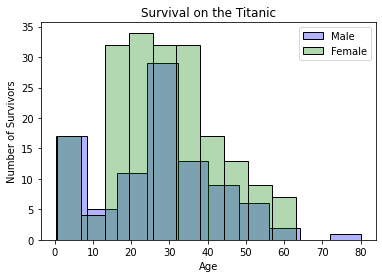

In [ ]:

male = titanic[titanic['sex']=='male']
female = titanic[titanic['sex']=='female']

survival_axis = sns.histplot(male[male['survived']==1].age.dropna(), bins=10, label='Male', color='blue', alpha=0.3)
survival_axis = sns.histplot(female[female['survived']==1].age.dropna(), bins=10, label="Female", color='green', alpha=0.3)
survival_axis.legend()
survival_axis.set(xlabel='Age', ylabel='Number of Survivors')
survival_axis.set_title('Survival on the Titanic')


In [ ]:
# Problem 1 (End)

In [ ]:
# Problem 2 (Start)

In [ ]:
from sklearn.impute import SimpleImputer

auto_dataset_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
auto_dataset = pd.read_csv('auto-mpg.data', delim_whitespace=True, header=None, names=auto_dataset_cols)

imputer = SimpleImputer(missing_values='?', strategy='constant', fill_value=np.nan)
imputer = imputer.fit(auto_dataset)

auto_dataset = imputer.transform(auto_dataset)

auto_dataset = pd.DataFrame(auto_dataset, columns=auto_dataset_cols) 

display(auto_dataset.iloc[32]) # Line 32 is the first instance of '?' in the horsepower column; '?' has been changed to 'NaN'


mpg                     25
cylinders                4
displacement            98
horsepower             NaN
weight                2046
acceleration            19
model year              71
origin                   1
car name        ford pinto
Name: 32, dtype: object

In [ ]:
# mpg Summary Statistics

print("Max mpg:", auto_dataset['mpg'].max())
print("Min mpg:", auto_dataset['mpg'].min())
print("Average mpg:", auto_dataset['mpg'].mean())
print("Median mpg:", auto_dataset['mpg'].median())
print("Std mpg:", auto_dataset['mpg'].std())

Max mpg: 46.6
Min mpg: 9.0
Average mpg: 23.514572864321615
Median mpg: 23.0
Std mpg: 7.815984312565782


In [ ]:
# Cylinders Summary Statistics

print("Max cylinder:", auto_dataset['cylinders'].max())
print("Min cylinder:", auto_dataset['cylinders'].min())
print("Average cylinder:", auto_dataset['cylinders'].mean())
print("Median cylinder:", auto_dataset['cylinders'].median())
print("Std cylinder:", auto_dataset['cylinders'].std())

Max cylinder: 8
Min cylinder: 3
Average cylinder: 5.454773869346734
Median cylinder: 4.0
Std cylinder: 1.7010042445332119


In [ ]:
# Displacement Summary Statistics

print("Max displacement:", auto_dataset['displacement'].max())
print("Min displacement:", auto_dataset['displacement'].min())
print("Average displacement:", auto_dataset['displacement'].mean())
print("Median displacement:", auto_dataset['displacement'].median())
print("Std displacement:", auto_dataset['displacement'].std())

Max displacement: 455.0
Min displacement: 68.0
Average displacement: 193.42587939698493
Median displacement: 148.5
Std displacement: 104.26983817119591


In [ ]:
# Horsepower Summary Statistics

auto_dataset['horsepower'] = pd.to_numeric(auto_dataset['horsepower'])

print("Max horsepower:", auto_dataset['horsepower'].max())
print("Min horsepower:", auto_dataset['horsepower'].min())
print("Average horsepower:", auto_dataset['horsepower'].mean())
print("Median horsepower:", auto_dataset['horsepower'].median())
print("Std horsepower:", auto_dataset['horsepower'].std())
print("Mode horsepower:", auto_dataset['horsepower'].mode())

Max horsepower: 230.0
Min horsepower: 46.0
Average horsepower: 104.46938775510205
Median horsepower: 93.5
Std horsepower: 38.49115993282855
Mode horsepower: 0    150.0
dtype: float64


In [ ]:
# Weight Summary Statistics

print("Max weight:", auto_dataset['weight'].max())
print("Min weight:", auto_dataset['weight'].min())
print("Average weight:", auto_dataset['weight'].mean())
print("Median weight:", auto_dataset['weight'].median())
print("Std weight:", auto_dataset['weight'].std())

Max weight: 5140.0
Min weight: 1613.0
Average weight: 2970.424623115578
Median weight: 2803.5
Std weight: 846.8417741973268


In [ ]:
# Acceleration Summary Statistics

print("Max acceleration:", auto_dataset['acceleration'].max())
print("Min acceleration:", auto_dataset['acceleration'].min())
print("Average acceleration:", auto_dataset['acceleration'].mean())
print("Median acceleration:", auto_dataset['acceleration'].median())
print("Std acceleration:", auto_dataset['acceleration'].std())

Max acceleration: 24.8
Min acceleration: 8.0
Average acceleration: 15.568090452261291
Median acceleration: 15.5
Std acceleration: 2.757688929812676


In [ ]:
# Model Year Summary Statistics

print("Max model year:", auto_dataset['model year'].max())
print("Min model year:", auto_dataset['model year'].min())
print("Average model year:", auto_dataset['model year'].mean())
print("Median model year:", auto_dataset['model year'].median())
print("Std model year:", auto_dataset['model year'].std())

Max model year: 82
Min model year: 70
Average model year: 76.01005025125629
Median model year: 76.0
Std model year: 3.697626646732623


In [ ]:
# Origin Summary Statistics

print("Max origin:", auto_dataset['origin'].max())
print("Min origin:", auto_dataset['origin'].min())
print("Average origin:", auto_dataset['origin'].mean())
print("Median origin:", auto_dataset['origin'].median())
print("Std origin:", auto_dataset['origin'].std())

Max origin: 3
Min origin: 1
Average origin: 1.5728643216080402
Median origin: 1.0
Std origin: 0.8020548777266148


In [ ]:
# Replacing all instances of 'NaN' in 'horsepower' with the average horsepower

auto_dataset_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
auto_dataset_hpavg = pd.read_csv('auto-mpg.data', delim_whitespace=True, header=None, names=auto_dataset_cols)
imputer = SimpleImputer(missing_values='?', strategy='constant', fill_value=np.nan)
imputer = imputer.fit(auto_dataset_hpavg)
auto_dataset_hpavg = imputer.transform(auto_dataset_hpavg)
auto_dataset_hpavg = pd.DataFrame(auto_dataset_hpavg, columns=auto_dataset_cols)
auto_dataset_hpavg['horsepower'] = pd.to_numeric(auto_dataset_hpavg['horsepower'])
auto_dataset_hpavg['horsepower'] = auto_dataset_hpavg['horsepower'].fillna(auto_dataset_hpavg['horsepower'].mean())
display(auto_dataset_hpavg.iloc[32])
print("Variance of horsepower:", auto_dataset_hpavg.var()['horsepower']) # Variance of 'horsepower' with the replacement

mpg                     25
cylinders                4
displacement            98
horsepower         104.469
weight                2046
acceleration            19
model year              71
origin                   1
car name        ford pinto
Name: 32, dtype: object

Variance of horsepower: 1459.1779160026776


In [ ]:
# Replacing all instances of 'NaN' in 'horsepower' with the median horsepower

auto_dataset_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
auto_dataset_hpmed = pd.read_csv('auto-mpg.data', delim_whitespace=True, header=None, names=auto_dataset_cols)
imputer = SimpleImputer(missing_values='?', strategy='constant', fill_value=np.nan)
imputer = imputer.fit(auto_dataset_hpmed)
auto_dataset_hpmed = imputer.transform(auto_dataset_hpmed)
auto_dataset_hpmed = pd.DataFrame(auto_dataset_hpmed, columns=auto_dataset_cols)
auto_dataset_hpmed['horsepower'] = pd.to_numeric(auto_dataset_hpmed['horsepower'])
auto_dataset_hpmed['horsepower'] = auto_dataset_hpmed['horsepower'].fillna(auto_dataset_hpmed['horsepower'].median())
display(auto_dataset_hpmed.iloc[32])
print("Variance of horsepower:", auto_dataset_hpmed.var()['horsepower']) # Variance of 'horsepower' with the replacement

mpg                     25
cylinders                4
displacement            98
horsepower            93.5
weight                2046
acceleration            19
model year              71
origin                   1
car name        ford pinto
Name: 32, dtype: object

Variance of horsepower: 1460.96905180816


In [ ]:
# Replacing all instances of 'NaN' in 'horsepower' with the mode horsepower
auto_dataset_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
auto_dataset_hpmod = pd.read_csv('auto-mpg.data', delim_whitespace=True, header=None, names=auto_dataset_cols)
imputer = SimpleImputer(missing_values='?', strategy='constant', fill_value=np.nan)
imputer = imputer.fit(auto_dataset_hpmod)
auto_dataset_hpmod = imputer.transform(auto_dataset_hpmod)
auto_dataset_hpmod = pd.DataFrame(auto_dataset_hpmod, columns=auto_dataset_cols)
auto_dataset_hpmod['horsepower'] = pd.to_numeric(auto_dataset_hpmod['horsepower'])
auto_dataset_hpmod['horsepower'] = auto_dataset_hpmod['horsepower'].fillna(150)
display(auto_dataset_hpmod.iloc[32])
print("Variance of horsepower:", auto_dataset_hpmod.var()['horsepower']) # Variance of 'horsepower' with the replacement

mpg                     25
cylinders                4
displacement            98
horsepower             150
weight                2046
acceleration            19
model year              71
origin                   1
car name        ford pinto
Name: 32, dtype: object

Variance of horsepower: 1490.0361252104324


In [ ]:
# Problem 2 (End)

In [ ]:
# Problem 3 (Start)

In [ ]:
iris_dataset = pd.read_csv('iris.data', names=['sepal length','sepal width','petal length','petal width','species'])
iris_dataset.keys()

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'species'],
      dtype='object')

In [ ]:
iris_dataset.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_dataset.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Before performing PCA we must standardize the data w/in iris_dataset

from sklearn.preprocessing import StandardScaler
iris_features = ['sepal length','sepal width','petal length','petal width']
features = iris_dataset.loc[:, iris_features].values
sep_species = iris_dataset.loc[:,['species']].values
features = StandardScaler().fit_transform(features)
iris_standardize = pd.DataFrame(data=features, columns=iris_features) # iris_standardize is an updated iris_dataset with its data standardized
iris_standardize.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [ ]:
# Performing PCA 

from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principal_components = pca.fit_transform(features)
iris_principal = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])
iris_principal = pd.concat([iris_principal, iris_dataset[['species']]], axis=1) # iris_principal is a new iris dataframe w/ 4 principal components
iris_principal.head()

,PC1,PC2,PC3,PC4,species
0,-2.264542,0.505704,-0.121943,-0.023073,Iris-setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,Iris-setosa
2,-2.367950,-0.318477,0.051480,-0.027825,Iris-setosa
3,-2.304197,-0.575368,0.098860,0.066311,Iris-setosa
4,-2.388777,0.674767,0.021428,0.037397,Iris-setosa


In [ ]:
# Computing the variance of each principal component in iris_principal & the variance sum

display(iris_principal.var())
print("Total variance:", sum(iris_principal.var()))

PC1    2.930354
PC2    0.927404
PC3    0.148342
PC4    0.020746
dtype: float64

Total variance: 4.02684563758389


In [ ]:
# Computing the percentage of variance for each principal component
iris_principal.var()/sum(iris_principal.var())

PC1    0.727705
PC2    0.230305
PC3    0.036838
PC4    0.005152
dtype: float64

In [ ]:
# Computing the variance of each feature in iris_dataset & the variance sum

display(iris_dataset.var())
print("Total variance:", sum(iris_dataset.var()))

sepal length    0.685694
sepal width     0.188004
petal length    3.113179
petal width     0.582414
dtype: float64

Total variance: 4.5692912751677826


In [ ]:
# Computing the percentage of variance for each feature in iris_dataset
iris_dataset.var()/sum(iris_dataset.var())

sepal length    0.150066
sepal width     0.041145
petal length    0.681327
petal width     0.127463
dtype: float64

In [ ]:
# Problem 3 (End)

In [ ]:
# Problem 4 (Start)

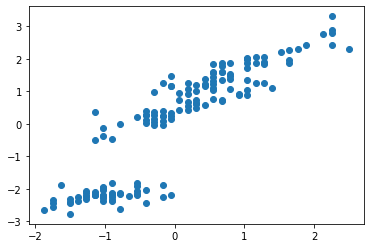

In [ ]:
# Scatter plot of PC1 vs sepal length (standardized)

PC1_arr = iris_principal['PC1'].to_numpy()
sepal_len_arr = iris_standardize['sepal length'].to_numpy()
plt.scatter(sepal_len_arr, PC1_arr)
plt.show()

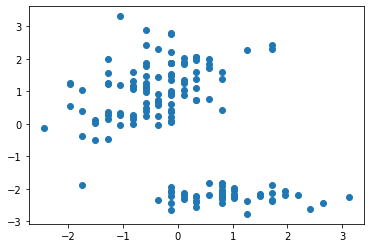

In [ ]:
# Scatter plot of PC1 vs sepal width (standardized)

sepal_wid_arr = iris_standardize['sepal width'].to_numpy()
plt.scatter(sepal_wid_arr, PC1_arr)
plt.show()

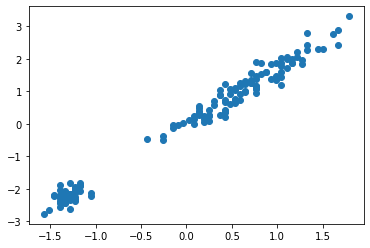

In [ ]:
# Scatter plot of PC1 vs petal length (standardized)

petal_len_arr = iris_standardize['petal length'].to_numpy()
plt.scatter(petal_len_arr, PC1_arr)
plt.show()

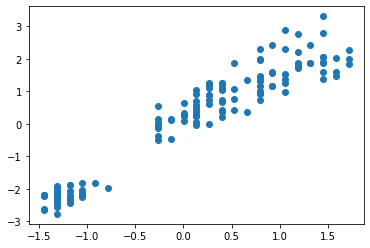

In [ ]:
# Scatter plot of PC1 vs petal width (standardized)

petal_wid_arr = iris_standardize['petal width'].to_numpy()
plt.scatter(petal_wid_arr, PC1_arr)
plt.show()

In [ ]:
# Computing correlation coefficent b/w petal length and petal width

from scipy.stats import pearsonr
length_arr = iris_dataset['petal length'].to_numpy()
width_arr = iris_dataset['petal width'].to_numpy()
petal_corr, _ = pearsonr(length_arr, width_arr)
print('Petal length-petal width correlation: %.3f' % petal_corr)

Petal length-petal width correlation: 0.963


In [ ]:
# Computing correlation coefficent b/w PC1 and petal length
PC1_petallen_corr, _ = pearsonr(length_arr, PC1_arr)
print('PC1-petal length correlation: %.3f' % PC1_petallen_corr)

PC1-petal length correlation: 0.992


In [ ]:
# Computing correlation coefficent b/w PC1 and petal width
PC1_petalwid_corr, _ = pearsonr(width_arr, PC1_arr)
print('PC1-petal width correlation: %.3f' % PC1_petalwid_corr)

PC1-petal width correlation: 0.965


In [ ]:
# Problem 4 (End)

In [ ]:
# Problem 5 (Start)

In [ ]:
# Computing total variance of the iris_dataset features and 4 eigenvectors (principal components)

print("Total variance (features):", sum(iris_dataset.var()))
print("Total variances (eigenvectors):", sum(iris_principal.var()))

Total variance (features): 4.5692912751677826
Total variances (eigenvectors): 4.02684563758389


In [ ]:
# Problem 5 (End)